In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from sklearn.datasets import load_iris

In [53]:
data = load_iris()
final_data = pd.DataFrame(data.data, columns = data.feature_names)
final_data['target'] = data.target
print(final_data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [54]:
final_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

visualize the data


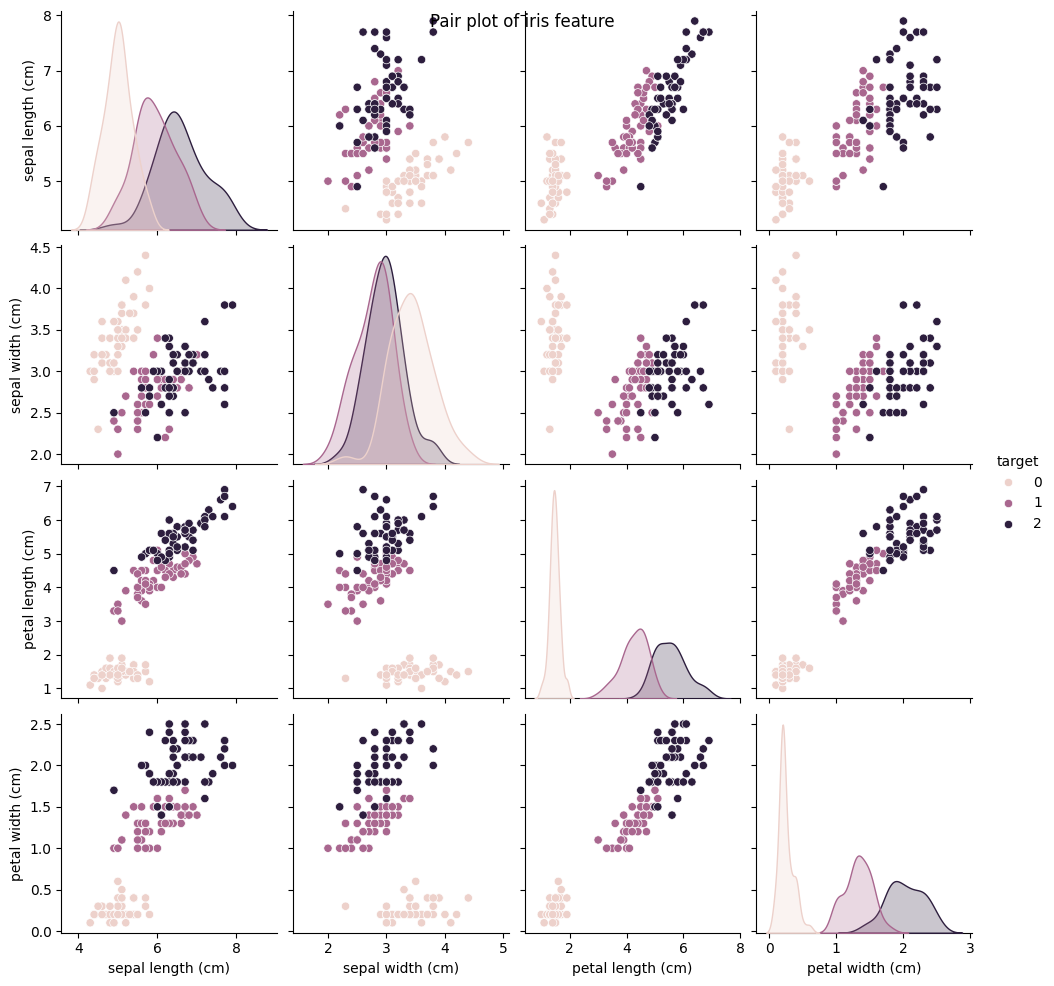

In [55]:
sns.pairplot(data= final_data, hue = 'target')
plt.suptitle('Pair plot of iris feature')
plt.show()

In [56]:
x = final_data.drop('target', axis = 1)
y = final_data['target']

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)

In [60]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv =5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\n Best Parameters:", best_params)
print("\n Best score:", best_score)


 Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}

 Best score: 0.9583333333333334


In [61]:
best_classifier = DecisionTreeClassifier(**best_params, random_state = 42)
best_classifier.fit(x_train, y_train)
y_pred = best_classifier.predict(x_test)


In [62]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))


Accuracy score:  1.0


Predict on new data


In [64]:

new_data = pd.DataFrame({
    'sepal length (cm)': [5.1, 6.0, 4.8],
    'sepal width (cm)': [3.5, 2.7, 3.0],
    'petal length (cm)': [1.4, 5.1, 1.5],
    'petal width (cm)': [0.2, 1.6, 0.3]
})
new_predictions = best_classifier.predict(new_data)
print("\nPredictions on new unseen data:")
print(new_predictions)




Predictions on new unseen data:
[0 2 0]


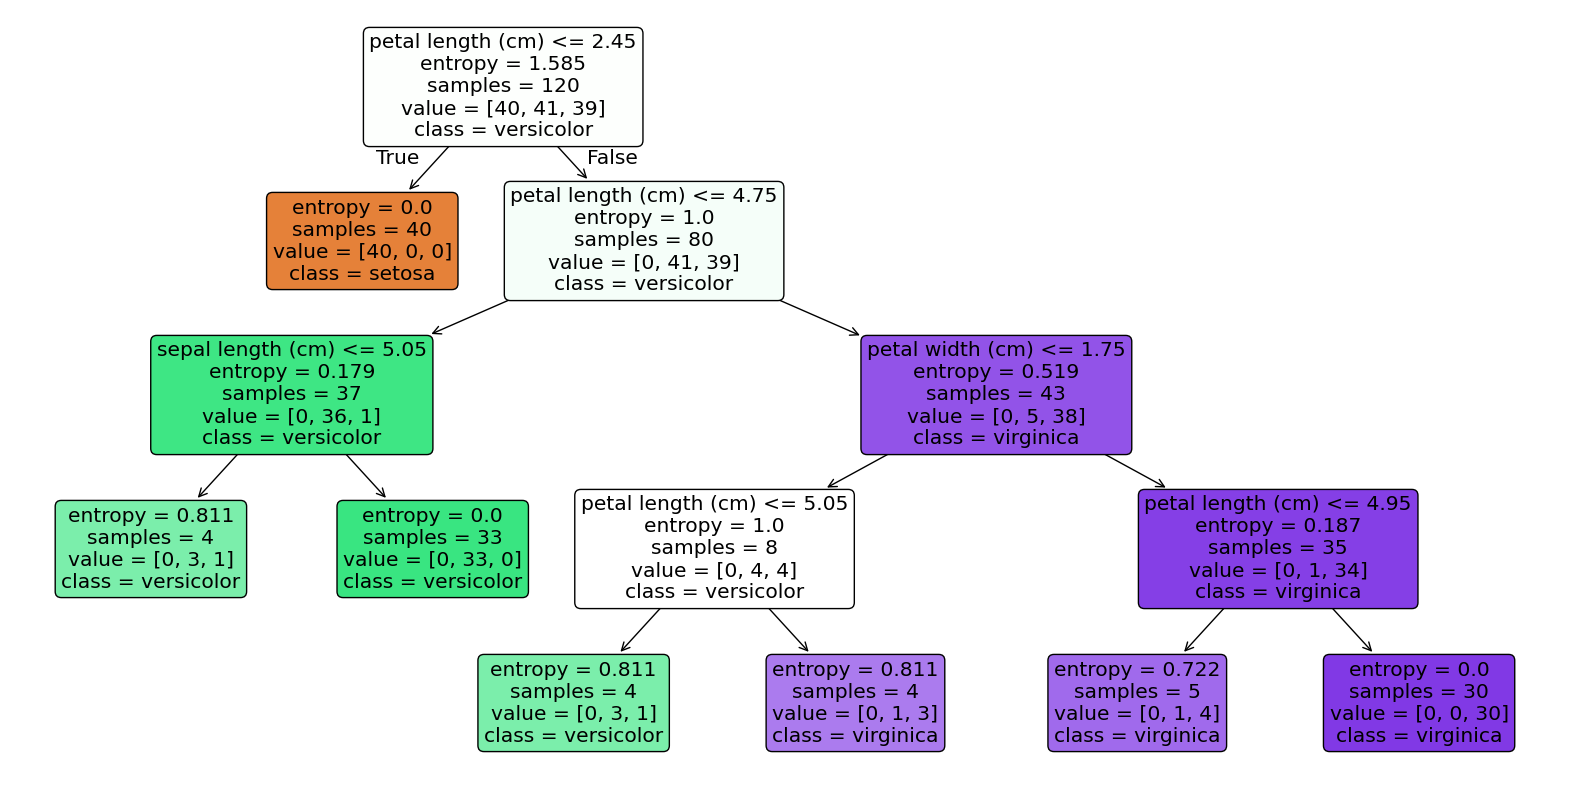

In [71]:
from sklearn.tree import plot_tree
plt.figure(figsize= (20,10))
feature_names = data.feature_names
target_names = data.target_names
plot_tree(best_classifier, filled = True, feature_names = feature_names, class_names = target_names, rounded = True)
plt.show()